In [22]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install searborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement searborn (from versions: none)
ERROR: No matching distribution found for searborn


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
from io import BytesIO
import requests 
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
response.raise_for_status()

# Lire le contenu de la réponse
content = response.content

# Charger le contenu dans un DataFrame pandas
df = pd.read_csv(BytesIO(content))

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

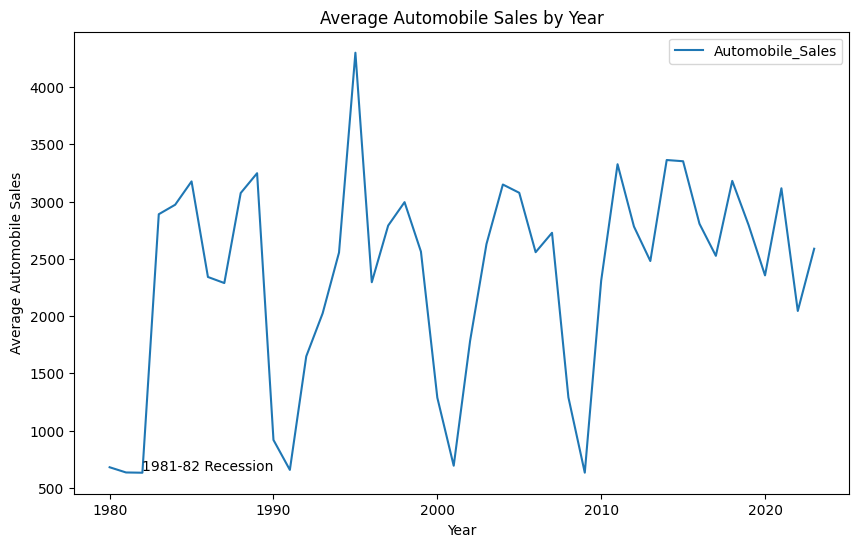

In [9]:
plt.figure(figsize=(10, 6)) 
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
#plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Year')
plt.show()


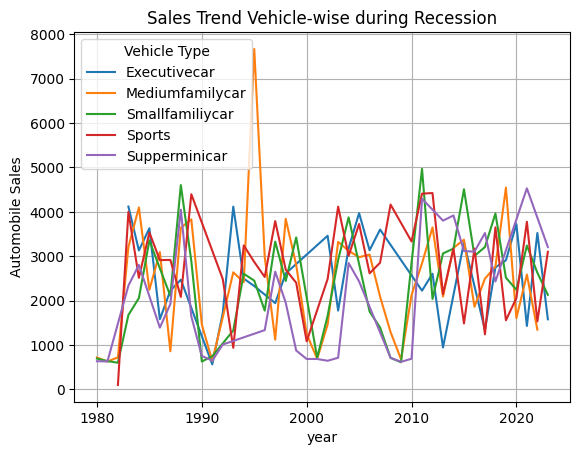

In [10]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)

df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

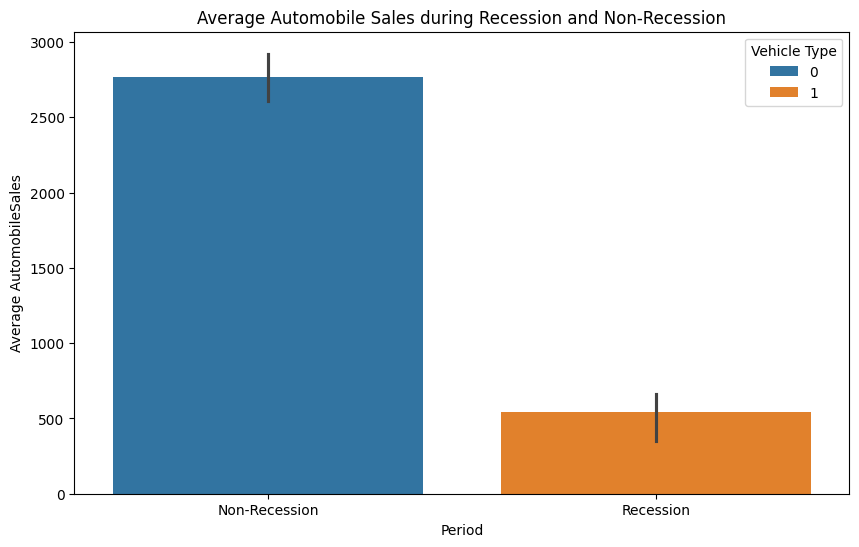

In [11]:
df = pd.read_csv(BytesIO(content))
df['Recession'] = df['Recession'].astype(int)
new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()


# Create the bar chart using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Period')
plt.ylabel('Average AutomobileSales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.legend(title='Vehicle Type')
plt.show()

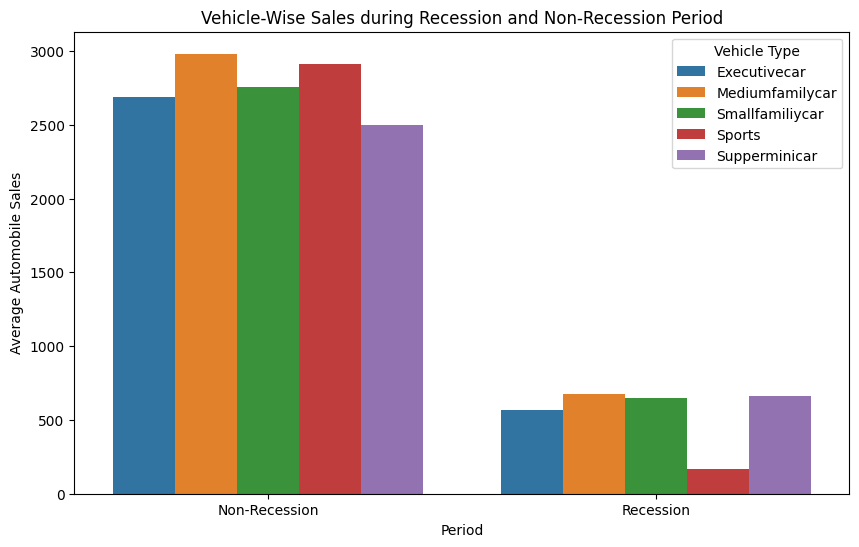

In [12]:
# Filtrer les données pour les périodes de récession et de non-récession
df['Recession'] = df['Recession'].astype(int)  # Assurer que la colonne Recession est bien de type entier

# Grouper les données par récession et type de véhicule et calculer la moyenne des ventes d'automobiles
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Créer le graphique en barres groupées avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type')
plt.show()

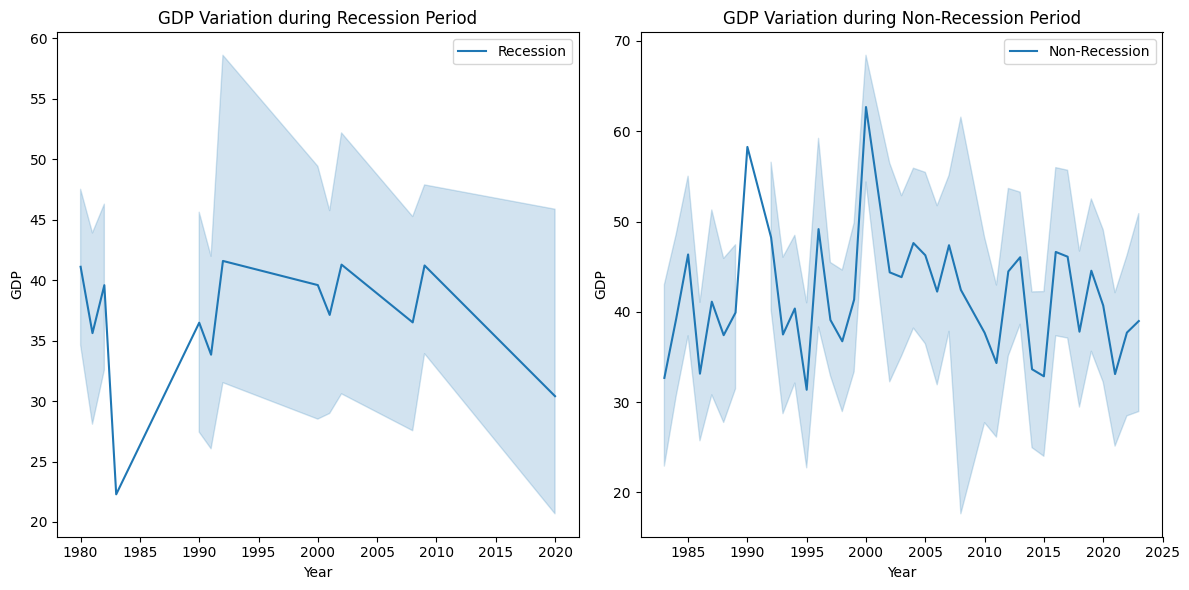

In [13]:
# Créer des dataframes pour les périodes de récession et de non-récession
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Créer différents axes pour les sous-graphes
ax0 = fig.add_subplot(1, 2, 1) # Ajouter le premier sous-graphe (1 ligne, 2 colonnes, premier plot)
ax1 = fig.add_subplot(1, 2, 2) # Ajouter le second sous-graphe (1 ligne, 2 colonnes, second plot)

# Tracer le graphique pour la période de récession
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Tracer le graphique pour la période de non-récession
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


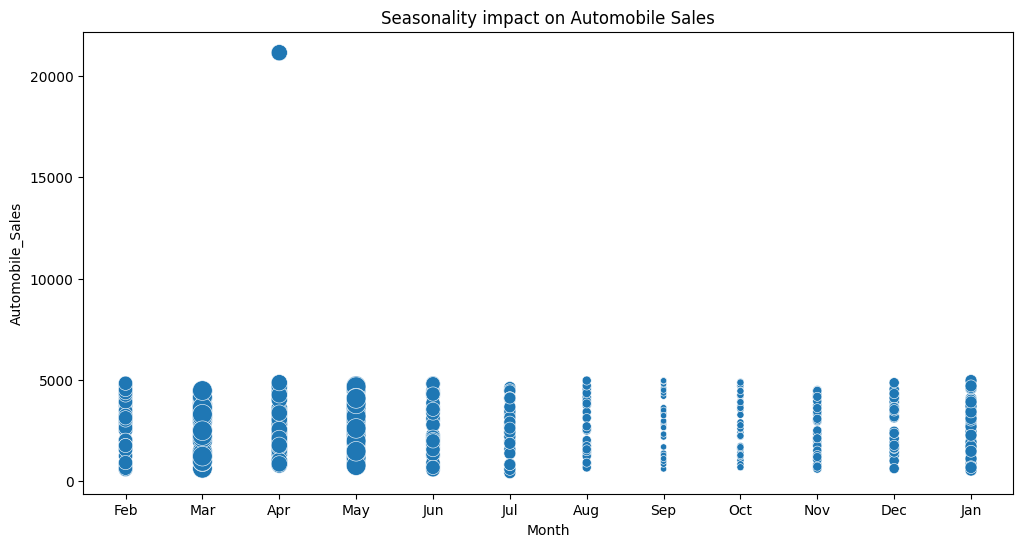

In [14]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect

plt.figure(figsize=(12, 6))    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(20, 200))
    
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

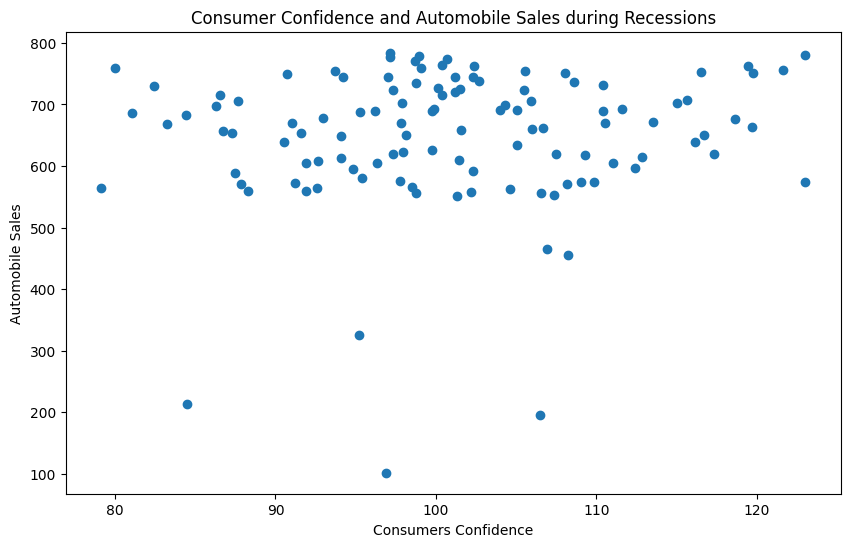

In [15]:
    #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumers Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

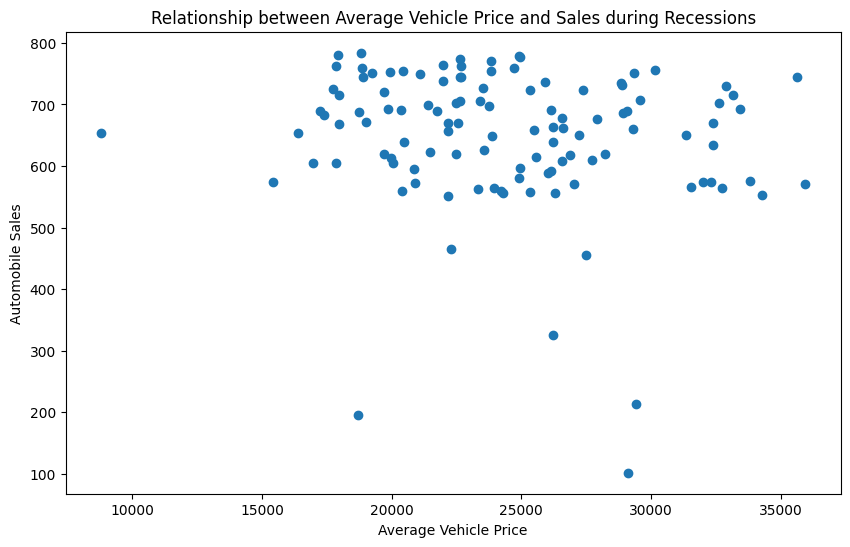

In [18]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

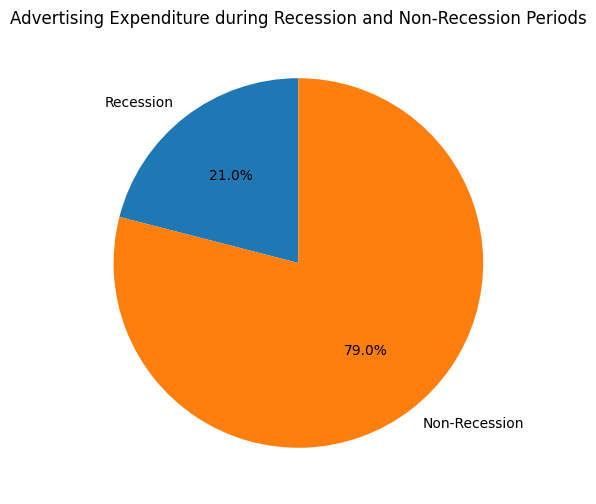

In [21]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

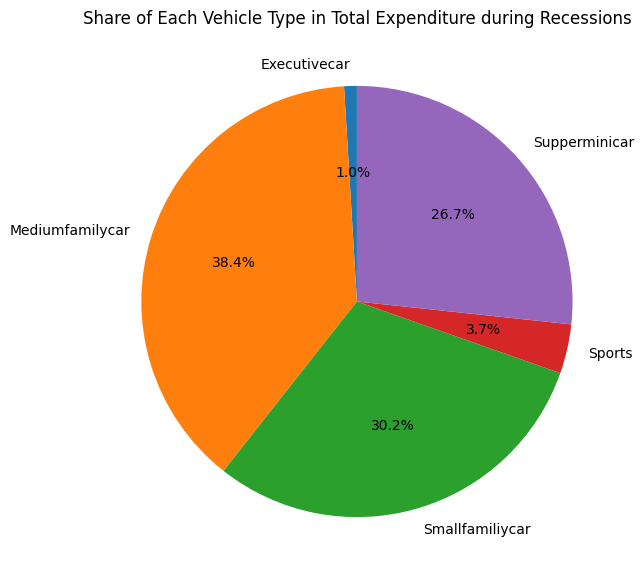

In [22]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 7))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')
Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


C:\Users\kuimi\AppData\Local\Temp\ipykernel_13644\734173893.py:11: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type',


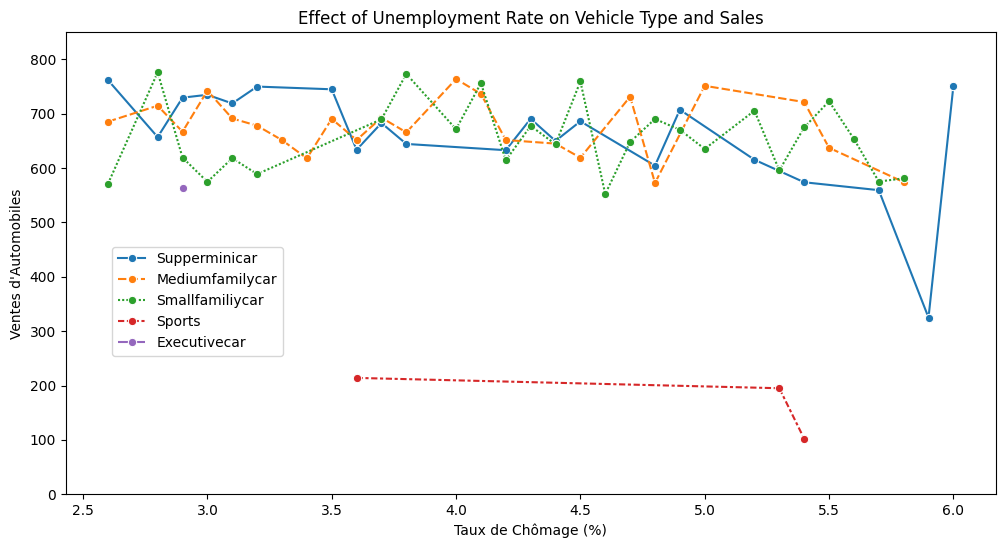

In [29]:
print(df.columns)

# Filtrer les données pour les périodes de récession
df_rec = df[df['Recession'] == 1]

# Assurez-vous que les colonnes existent
print(df_rec.columns)

# Créer le graphique linéaire avec les noms de colonnes corrects
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type',
             style='Vehicle_Type', markers='o', err_style=None)

plt.xlabel('Taux de Chômage (%)')
plt.ylabel('Ventes d\'Automobiles')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0, 850)
plt.legend(loc=(0.05, .3))

plt.show()

In [36]:
import dash
#import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
            style={'textAlign': 'center', 'color': '#503D36', 'font-size': '24px'}
    ),
    #TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        
        )
    ]),

    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select-year',
            placeholder='Select-year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        )
    ]),

    #TASK 2.3: Add a division for output display   
    html.Div([
        html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    ])
])

#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics': 
        return False
    else: 
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), 
     Input(component_id='select-year', component_property='value')]
)


def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics
#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period")
        )
#Plot 2 Calculate the average number of vehicles sold by vehicle type               
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()                 
        R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title="Average Number of Vehicles Sold by Vehicle Type")
        )        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
        figure=px.pie(exp_rec,
        values='Advertising_Expenditure',
        names='Vehicle_Type',
        title="Total Expenditure Share by Vehicle Type During Recessions")
        )        
# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemp_data,
            x='unemployment_rate',
            y='Automobile_Sales',
            color='Vehicle_Type',
            labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
            title='Effect of Unemployment Rate on Vehicle Type and Sales')
        )
        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)],style={'display': 'flex'})
            ]
# TASK 2.6: Create and display graphs for Yearly Report Statistics                             
    elif (input_year and selected_statistics=='Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                                                            
#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas,
                x='Year',
                y='Automobile_Sales',
                title='Yearly Automobile Sales'))            
# Plot 2 Total Monthly Automobile sales using line chart.
        mas = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas,
                x='Month',
                y='Automobile_Sales',
                title='Total Monthly Automobile Sales'))
# Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(avr_vdata,
                x='Vehicle_Type',
                y='Automobile_Sales',
                title=f'Average Vehicles Sold by Vehicle Type in the year {input_year}'))    
# Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data,
                values='Advertising_Expenditure',
                names='Vehicle_Type',
                title='Total Advertisement Expenditure for Each Vehicle'))
#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
            html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
        ]
    else:
        return None
# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Changed port to 8051
